In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
from matplotlib.figure import Figure

from imports import *
import scipy.spatial as spsp

import scipy.ndimage
#np.random.seed(20160621)
np.random.seed(20160622)
%matplotlib inline

Import image and display

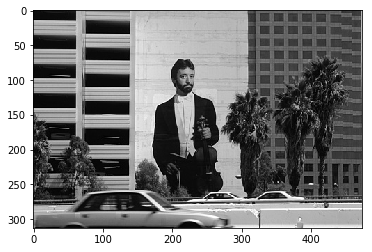

In [2]:
data = scipy.ndimage.imread('building.png', mode='L')
data=data.astype('float')/255.0

# Show the image
plt.imshow(data,cmap='gray')
plt.show()


In [3]:
m,n = data.shape
row_leafcolors = np.arange(0, m)
col_leafcolors = np.arange(0, n)

Run biorganization for 2 iterations

In [4]:
import questionnaire
init_aff_type = questionnaire.INIT_AFF_GAUSSIAN
row_tree_type = questionnaire.TREE_TYPE_FLEXIBLE
col_tree_type = questionnaire.TREE_TYPE_FLEXIBLE
row_aff_type = questionnaire.DUAL_EMD
col_aff_type = questionnaire.DUAL_EMD
kwargs = {}
kwargs["n_iters"] = int(2)
init_tree = [row_tree_type, col_tree_type]
params = questionnaire.PyQuestParams(init_aff_type, init_tree,
             row_aff_type, col_aff_type, **kwargs)

row_beta = 1.0
col_beta = 1.0
row_alpha = 0.0
col_alpha = 0.0
params.row_tree_constant = 1
params.col_tree_constant = 1
n_eigs = 4

qrun = questionnaire.pyquest(data,params)

Iteration 0: calculating column affinity...
Iteration 0: calculating column tree...
Iteration 0: calculating row affinity...
Iteration 0: calculating row tree...
Iteration 1: calculating column affinity...
Iteration 1: calculating column tree...
Iteration 1: calculating row affinity...
Iteration 1: calculating row tree...


Output trees

In [5]:
row_tree = qrun.row_trees[-1]
col_tree = qrun.col_trees[-1]

Reorganizing image by trees reveals block-like structure

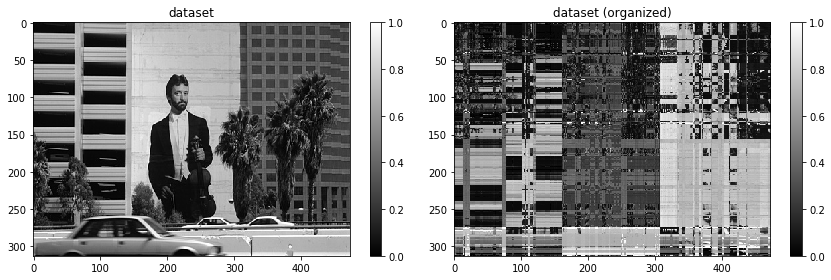

In [6]:
fig = plt.figure(figsize = (12,4))
fig.add_subplot(121)
bwplot(data,colorbar=True,title="dataset")
fig.add_subplot(122)
bwplot(barcode.organize_folders(row_tree,col_tree,data),
        colorbar=True,title="dataset (organized)")
plt.tight_layout()
plt.show()

Plot averaging and difference transform for row and col trees (Fig. 2)

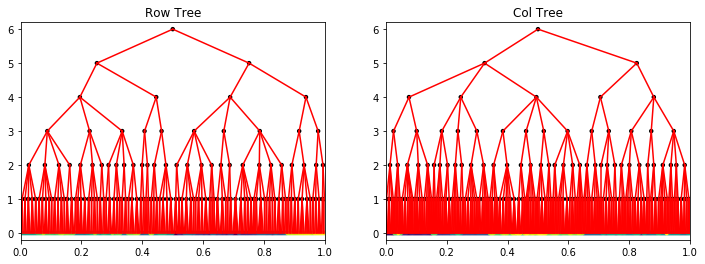

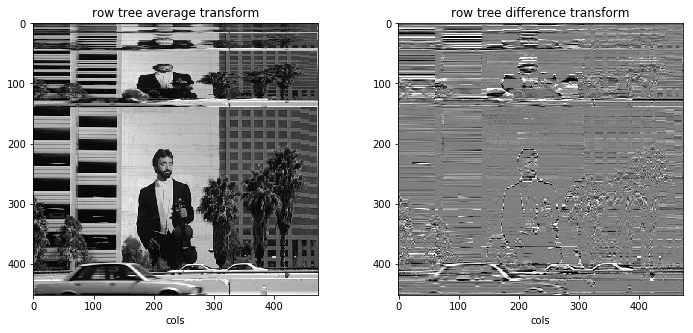

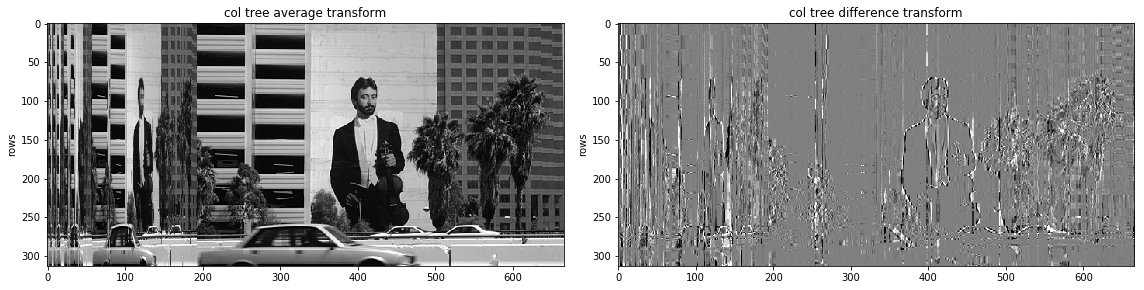

In [7]:
fig = plt.figure(figsize=(12,4))
fig.add_subplot(121)
plot_tree(row_tree,title="Row Tree" ,leafcolors=row_leafcolors, useplt=True)
fig.add_subplot(122)
plot_tree(col_tree,title="Col Tree" ,leafcolors=col_leafcolors, useplt=True)
plt.show()

fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
coefs = transform.averaging(data,row_tree)
coefs = coefs
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('row tree average transform')
plt.xlabel('cols')

fig.add_subplot(122)
coefs = transform.difference(data,row_tree)
coefs = coefs
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray',vmin=-0.3,vmax=0.3)
plt.title('row tree difference transform')
plt.xlabel('cols')
plt.show()

fig = plt.figure(figsize=(16,5))
fig.add_subplot(121)
coefs = transform.averaging(data.T,col_tree)
coefs = coefs.T
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('col tree average transform')
plt.ylabel('rows')

fig.add_subplot(122)
coefs = transform.difference(data.T,col_tree)
coefs = coefs.T 
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray',vmin=-0.3,vmax=0.3)
plt.title('col tree difference transform')
plt.ylabel('rows')
plt.tight_layout()
plt.show()


Plot joint averaging and difference transforms (Fig. 3)

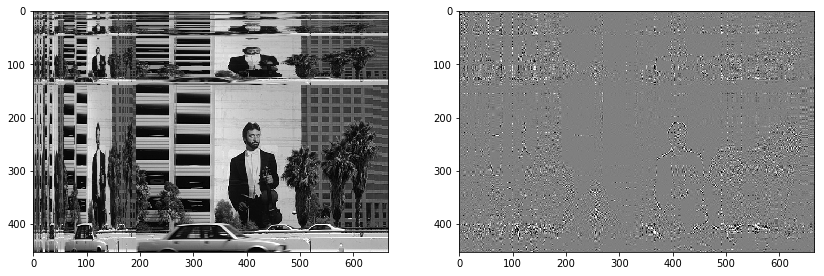

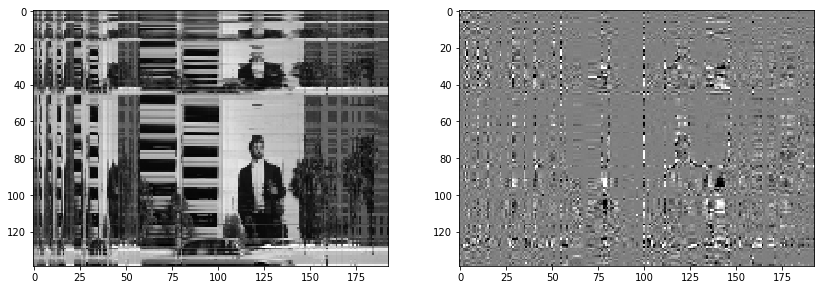

In [8]:
fig = plt.figure(figsize = (14,6))
fig.add_subplot(121)
temp = transform.joint_averaging(data,row_tree,col_tree)
plt.imshow(temp,interpolation='nearest',aspect='equal',cmap='gray')

fig.add_subplot(122)
coefs = transform.joint_difference(data,row_tree,col_tree)
plt.imshow(coefs,interpolation='nearest',aspect='equal',cmap='gray',vmin=-0.2,vmax=0.2)
plt.show()

row_singletons_start = row_tree.tree_size - m
col_singletons_start = col_tree.tree_size - n

fig = plt.figure(figsize = (14,6))
fig.add_subplot(121)
temp = transform.joint_averaging(data,row_tree,col_tree)
plt.imshow(temp[:row_singletons_start,:col_singletons_start],interpolation='nearest',aspect='equal',cmap='gray')

fig.add_subplot(122)
coefs = transform.joint_difference(data,row_tree,col_tree)
plt.imshow(coefs[:row_singletons_start,:col_singletons_start],interpolation='nearest',aspect='equal',cmap='gray',vmin=-0.2,vmax=0.2)
plt.show()

Plot EMD transform with varying alpha values in the weights

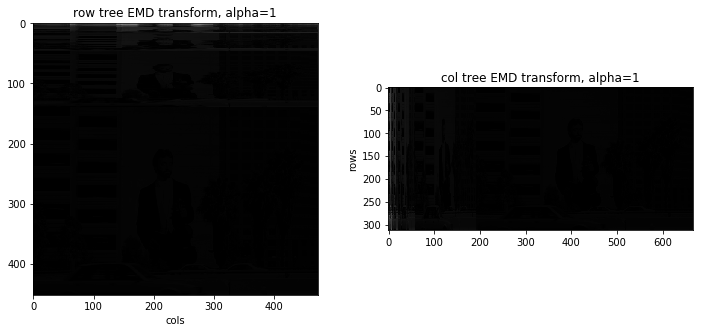

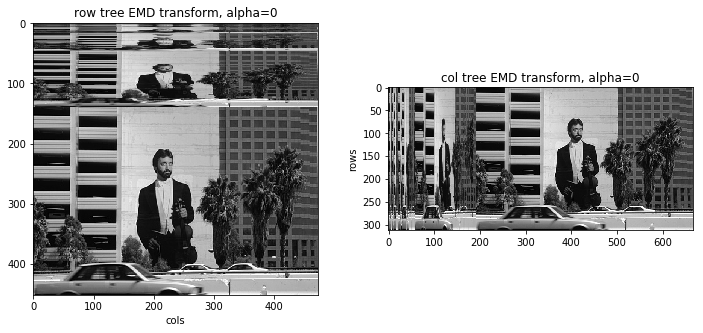

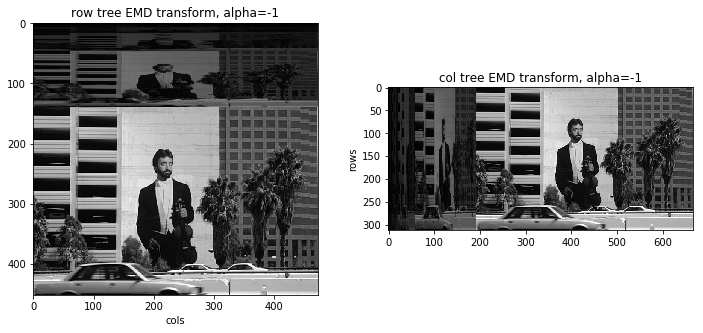

In [9]:
fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
coefs = transform.calc_1demd_transform(data,row_tree,alpha=1.0)
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('row tree EMD transform, alpha=1')
plt.xlabel('cols')

fig.add_subplot(122)
coefs = transform.calc_1demd_transform(data.T,col_tree,alpha=1.0)
plt.imshow(coefs.T, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('col tree EMD transform, alpha=1')
plt.ylabel('rows')
plt.show()

fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
coefs = transform.calc_1demd_transform(data,row_tree,alpha=0.0)
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('row tree EMD transform, alpha=0')
plt.xlabel('cols')

fig.add_subplot(122)
coefs = transform.calc_1demd_transform(data.T,col_tree,alpha=0.0)
plt.imshow(coefs.T, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('col tree EMD transform, alpha=0')
plt.ylabel('rows')
plt.show()

fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
coefs = transform.calc_1demd_transform(data,row_tree,alpha=-1.0)
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('row tree EMD transform, alpha=-1')
plt.xlabel('cols')

fig.add_subplot(122)
coefs = transform.calc_1demd_transform(data.T,col_tree,alpha=-1.0)
plt.imshow(coefs.T, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('col tree EMD transform, alpha=-1')
plt.ylabel('rows')
plt.show()

Plot EMD transform with varying beta values in the weights

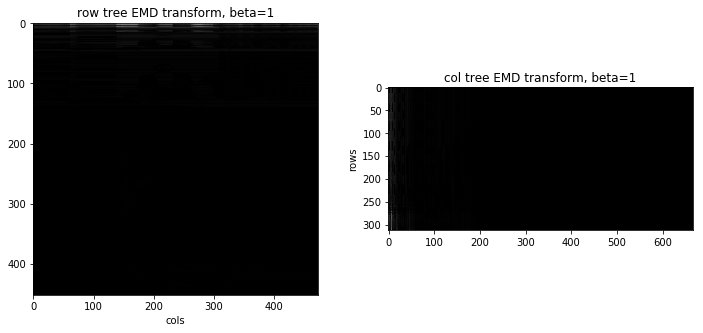

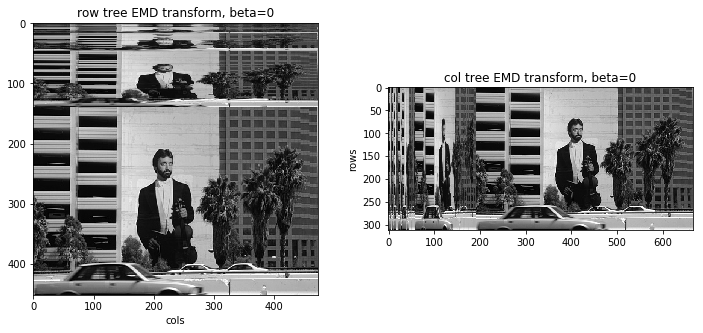

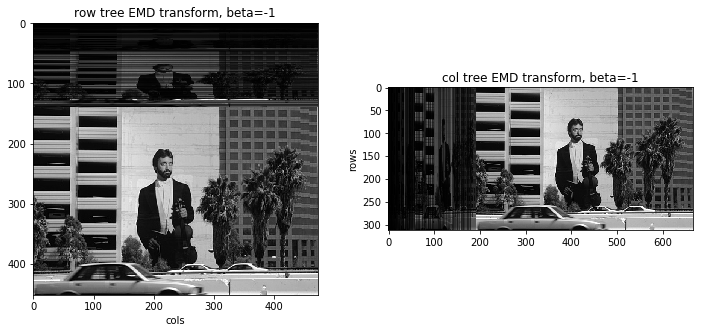

In [10]:
fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
coefs = transform.calc_1demd_transform(data,row_tree,alpha=0.0, beta=1.0)
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('row tree EMD transform, beta=1')
plt.xlabel('cols')

fig.add_subplot(122)
coefs = transform.calc_1demd_transform(data.T,col_tree,alpha=0.0, beta=1.0)
plt.imshow(coefs.T, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('col tree EMD transform, beta=1')
plt.ylabel('rows')
plt.show()

fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
coefs = transform.calc_1demd_transform(data,row_tree,alpha=0.0, beta=0.0)
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('row tree EMD transform, beta=0')
plt.xlabel('cols')

fig.add_subplot(122)
coefs = transform.calc_1demd_transform(data.T,col_tree,alpha=0.0, beta=0.0)
plt.imshow(coefs.T, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('col tree EMD transform, beta=0')
plt.ylabel('rows')
plt.show()

fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
coefs = transform.calc_1demd_transform(data,row_tree,alpha=0.0, beta=-1.0)
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('row tree EMD transform, beta=-1')
plt.xlabel('cols')

fig.add_subplot(122)
coefs = transform.calc_1demd_transform(data.T,col_tree,alpha=0.0, beta=-1.0)
plt.imshow(coefs.T, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('col tree EMD transform, beta=-1')
plt.ylabel('rows')
plt.show()

Plot joint-tree EMD transform with varying alpha values in the weights

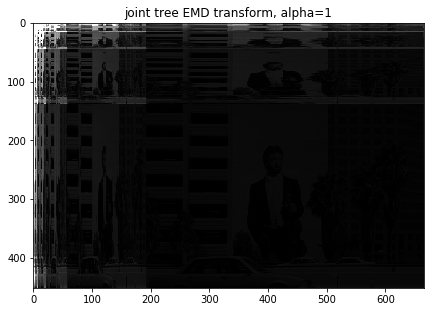

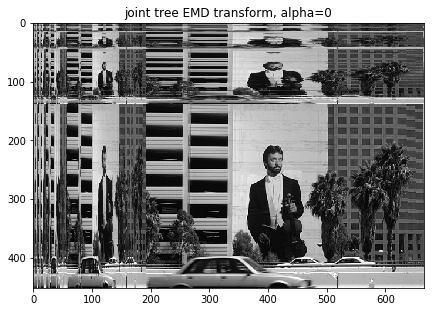

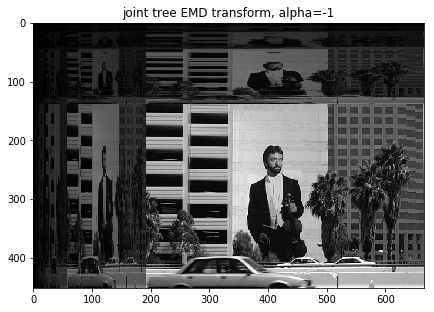

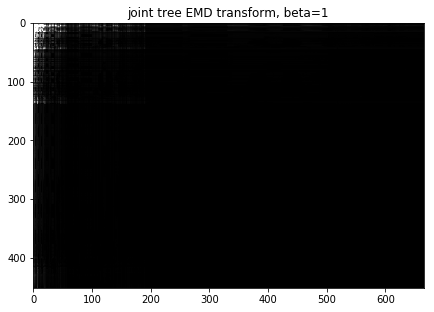

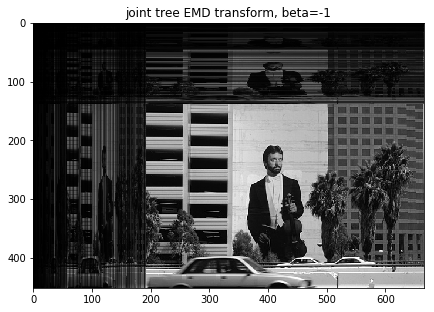

In [11]:
fig = plt.figure(figsize=(7,7))
coefs = transform.calc_2demd_transform(data,row_tree, col_tree, row_alpha=1.0, row_beta=0.0,
                         col_alpha=1.0, col_beta=0.0)
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray',vmax =0.005 )
plt.title('joint tree EMD transform, alpha=1')
plt.show()

fig = plt.figure(figsize=(7,7))
coefs = transform.calc_2demd_transform(data,row_tree, col_tree, row_alpha=0.0, row_beta=0.0,
                         col_alpha=0.0, col_beta=0.0)
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('joint tree EMD transform, alpha=0')
plt.show()

fig = plt.figure(figsize=(7,7))
coefs = transform.calc_2demd_transform(data,row_tree, col_tree, row_alpha=-1.0, row_beta=0.0,
                         col_alpha=-1.0, col_beta=0.0)
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('joint tree EMD transform, alpha=-1')
plt.show()

fig = plt.figure(figsize=(7,7))
coefs = transform.calc_2demd_transform(data,row_tree, col_tree, row_alpha=0.0, row_beta=1.0,
                         col_alpha=0.0, col_beta=1.0)
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray',vmax =0.005 )
plt.title('joint tree EMD transform, beta=1')
plt.show()

fig = plt.figure(figsize=(7,7))
coefs = transform.calc_2demd_transform(data,row_tree, col_tree, row_alpha=0.0, row_beta=-1.0,
                         col_alpha=0.0, col_beta=-1.0)
plt.imshow(coefs, interpolation='nearest', aspect='equal',cmap='gray')
plt.title('joint tree EMD transform, beta=-1')
plt.show()